# Logistic Regression
In this notebook on Logistic Regression, I've explained the complete process of creating a logistic model from loading the data to plotting a ROC curve.<br>
We are going to use breast cancer data from UCI [repository](), In this dataset our task is to classify cancer as **malignant** or **benign** on the basis of various measurments of tumor. I've also written the hypothesis and cost functions of Logistic Regression. To know more about logistic regression read scikit learn [docs](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)<br>
Below is the hypothesis function for Logistic Regression
$$Sigmoid\:or\:Logistic\:Function\:h(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + ....)}}$$
$where,$$$\beta = Parameters$$
Cost Function of Logistic Regression is as follows
$$Cost\:Function = -\frac{1}{m}[\sum_{i=1}^{n}ylog(h(x)) + (1 - y)log(1 - h(x))]$$

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from sklearn import datasets

### Loading Data

In [2]:
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [18]:
print('Target Names:')
print(cancer['target_names'])
print('\n')
print('Feature Names:')
print(cancer['feature_names'])

Target Names:
['malignant' 'benign']


Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Plotting Correlaton and Features
Creating function to plot heatmap, to visualize numerical matrix.

In [7]:
#Creating function for plotting
def heatmap(x):
    c = ['Blues', 'BuGn', 'PuBuGn', 'YlGnBu', 'PuBu', 'icefire_r', 'GnBu', 'Reds', 'Purples', 'Greys', 'YlOrRd', 'GnBu', 'PuRd']
    linewidth = 0.8
    return sns.heatmap(x, annot=True, cmap=np.random.choice(c), linewidth=linewidth)

### Visual Exploratory Data Analysis

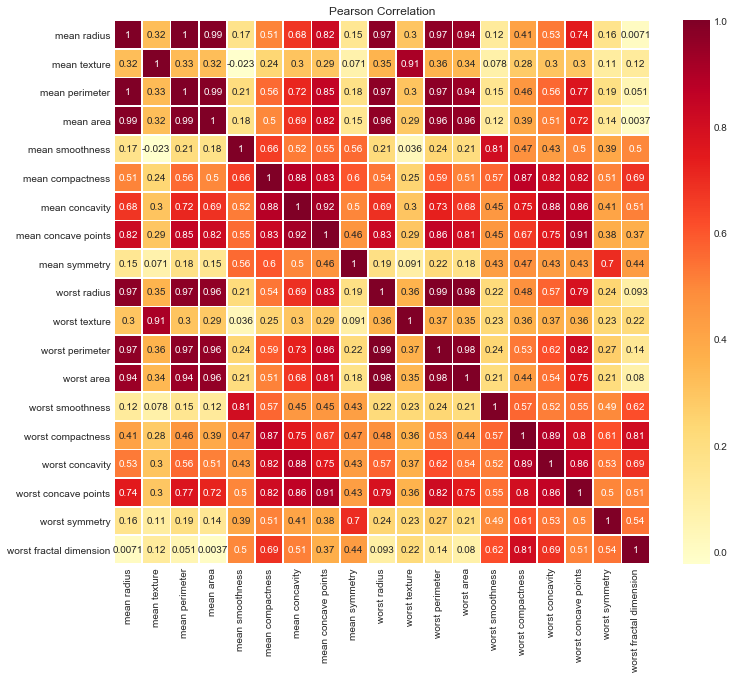

In [19]:
plt.figure(figsize=(12,10))
heatmap(df.iloc[:,np.r_[0:9, 20:30]].corr());
plt.title('Pearson Correlation');

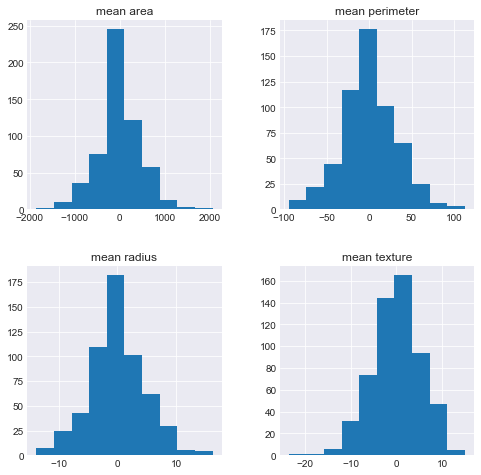

In [20]:
df.iloc[:, 0:4].diff().hist(figsize=(8,8));

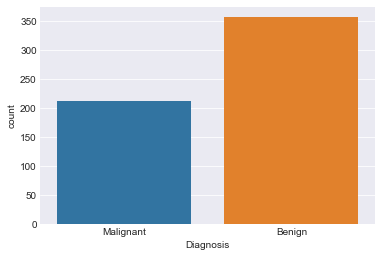

In [31]:
X = cancer['data']
y = cancer['target']
df['Diagnosis'] = cancer['target']
df['Diagnosis'] = df['Diagnosis'].map( {0:'Malignant', 1:'Benign'} ).astype(str)
sns.countplot(df['Diagnosis']);

### Splitting data into train and test

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Creating ML Pipeline
Scikit-Learn has a very useful pipeline function, in which we can just feed steps we want to perform such as imputing and scaling. In this dataset we have no missing value, so imputing isn't needed here.
Remember-

Scikit-Learn by default applies regularized model. You can choose the regularizaton type, like I've done below.<br>
To know more about regularizaton click [here](https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization-How-does-it-solve-the-problem-of-overfitting-Which-regularizer-to-use-and-when)

In [33]:
logistic_classifier = LogisticRegression(C=1, penalty='l2') #L2 regularization
steps = [('classifier', logistic_classifier)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('classifier', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

### Evaluating Performance
By looking at classification report and confusion-matrix below, we can see that our model did well.

In [34]:
pred = pipeline.predict(X_test)
#Plotting confusion-matrix
cm = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.97      0.88      0.92        64
          1       0.93      0.98      0.95       107

avg / total       0.94      0.94      0.94       171



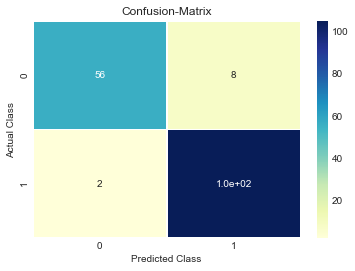

In [35]:
heatmap(cm);
plt.title('Confusion-Matrix')
plt.xlabel('Predicted Class');
plt.ylabel('Actual Class');

### Plotting ROC curve and AUC computation
ROC = Receiver Operating Characteristic Curve. Read about ROC in [detail](https://community.alteryx.com/t5/Data-Science-Blog/ROC-Curves-in-Python-and-R/ba-p/138430)<br>
AUC = Area under Curve

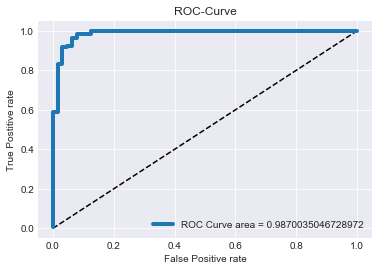

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = pipeline.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--');
plt.plot(fpr, tpr, label='ROC Curve area = {}'.format(auc), linewidth=4);
plt.title('ROC-Curve');
plt.xlabel('False Positive rate');
plt.ylabel('True Postitive rate');
plt.legend();

### Computing Log-Loss on our model

In [37]:
from sklearn.metrics import log_loss
log_loss(y_test, pred)

2.0198488931494065